In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-grade-prediction/student-mat.csv


# Preparação

In [2]:
dataset = pd.read_csv("/kaggle/input/student-grade-prediction/student-mat.csv")
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Removendo variáveis que não se aplicam ao escopo do problema.

- School: Não faz sentido diferenciar entre escolas, já que a ideia é prever alunos anônimos.
- G1 e G2: Como mencionado no próprio texto, estão bem correlacionadas a nota final. Não é o objetivo tentar prever ela a partir destas, e sim a partir das características dos estudantes.

In [3]:
del dataset["school"]
del dataset["G1"]
del dataset["G2"]

dataset.shape

(395, 30)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

## Pré-Processamento

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

target = 'G3'

binary_features = ['sex', 'address', 'famsize', 'Pstatus',
                   'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                   'higher', 'internet', 'romantic']

nominal_features = ['Mjob', 'Fjob', 'reason', 'guardian']

numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                      'failures', 'famrel', 'freetime', 'goout',
                      'Dalc', 'Walc', 'health', 'absences']

In [6]:
pd.set_option('future.no_silent_downcasting', True)

In [7]:
X = dataset.drop(columns=[target])
y = dataset[target]

# Regressão, então sem necessidade de stratify.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
181,M,16,U,GT3,T,3,3,services,other,home,...,yes,yes,yes,4,2,3,1,2,3,2
194,M,16,U,GT3,T,2,3,other,other,home,...,yes,yes,no,5,3,3,1,1,3,0
173,F,16,U,GT3,T,1,3,at_home,services,home,...,yes,yes,yes,4,3,5,1,1,3,0
63,F,16,U,GT3,T,4,3,teacher,health,home,...,yes,yes,no,3,4,4,2,4,4,2
253,M,16,R,GT3,T,2,1,other,other,course,...,yes,no,no,3,3,2,1,3,3,0


In [9]:
binary_map = {'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0}
X_train[binary_features] = X_train[binary_features].replace(binary_map)
X_test[binary_features] = X_test[binary_features].replace(binary_map)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 181 to 102
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         316 non-null    object
 1   age         316 non-null    int64 
 2   address     316 non-null    object
 3   famsize     316 non-null    object
 4   Pstatus     316 non-null    object
 5   Medu        316 non-null    int64 
 6   Fedu        316 non-null    int64 
 7   Mjob        316 non-null    object
 8   Fjob        316 non-null    object
 9   reason      316 non-null    object
 10  guardian    316 non-null    object
 11  traveltime  316 non-null    int64 
 12  studytime   316 non-null    int64 
 13  failures    316 non-null    int64 
 14  schoolsup   316 non-null    object
 15  famsup      316 non-null    object
 16  paid        316 non-null    object
 17  activities  316 non-null    object
 18  nursery     316 non-null    object
 19  higher      316 non-null    object
 20  internet    3

In [10]:
nominal_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features)
    ],
    remainder='passthrough' 
)

In [11]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

nominal_encoded_cols = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
all_columns = numerical_features + list(nominal_encoded_cols) + binary_features
X_train_df = pd.DataFrame(X_train_processed, columns=all_columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=all_columns, index=X_test.index)

In [12]:
X_train_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
181,-0.586396,0.246437,0.423207,-0.625779,-0.056853,-0.456744,0.064432,-1.195981,-0.144396,-0.55443,...,1,1,0,0,1,1,1,1,1,1
194,-0.586396,-0.680636,0.423207,0.828236,-1.254553,-0.456744,1.195575,-0.214345,-0.144396,-0.55443,...,1,1,0,0,0,0,1,1,1,0
173,-0.586396,-1.607709,0.423207,-0.625779,-0.056853,3.628097,0.064432,-0.214345,1.644982,-0.55443,...,1,1,0,0,0,1,0,1,1,1
63,-0.586396,1.17351,0.423207,-0.625779,1.140847,-0.456744,-1.06671,0.767292,0.750293,0.55443,...,1,1,1,1,1,1,1,1,1,0
253,-0.586396,-0.680636,-1.434203,0.828236,-1.254553,-0.456744,-1.06671,-0.214345,-1.039085,-0.55443,...,1,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.374912,1.17351,-0.505498,-0.625779,2.338548,-0.456744,-1.06671,-0.214345,-0.144396,-0.55443,...,1,1,0,0,0,0,1,1,1,0
106,-1.374912,-0.680636,-0.505498,-0.625779,2.338548,-0.456744,1.195575,-2.177617,-1.039085,-0.55443,...,1,1,1,1,1,0,1,1,1,0
270,1.779151,0.246437,0.423207,-0.625779,-0.056853,2.266484,0.064432,-0.214345,1.644982,1.663291,...,1,1,0,1,1,1,1,1,1,0
348,0.202119,1.17351,0.423207,-0.625779,1.140847,-0.456744,0.064432,0.767292,-0.144396,-0.55443,...,1,1,0,1,1,1,1,1,1,1


# Feature Selection

Métodos a serem utilizados:
- Correlação Estatística
- Select K Best
- RFE
- Árvore de Decisão 
- Regressão Linear com Lasso

## Correlação Estatística

failures             0.373769
Medu                 0.215968
higher               0.214106
paid                 0.160374
age                  0.146241
studytime            0.138200
Fedu                 0.135265
romantic             0.122786
internet             0.119413
Mjob_health          0.111647
traveltime           0.106752
goout                0.106024
reason_reputation    0.095625
Pstatus              0.085990
address              0.081045
famsize              0.075983
sex                  0.069819
famrel               0.069409
health               0.068857
guardian_other       0.068670
dtype: float64


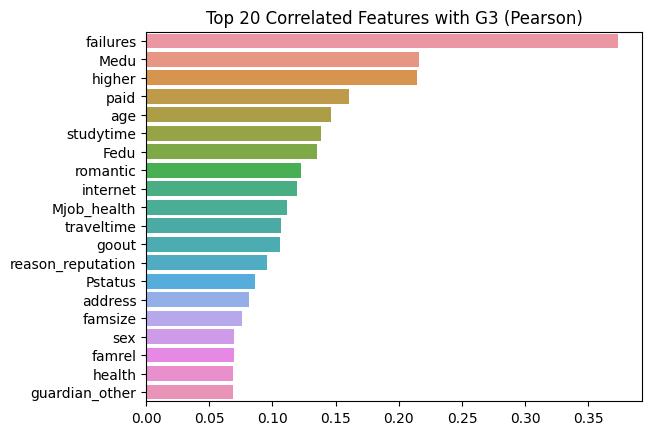

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corrs = X_train_df.corrwith(y_train).abs().sort_values(ascending=False)
print(corrs.head(20))

sns.barplot(x=corrs.head(20).values, y=corrs.head(20).index)
plt.title("Top 20 Correlated Features with G3 (Pearson)")
plt.show()

failures             0.348527
Medu                 0.213393
higher               0.204210
age                  0.155726
Fedu                 0.150095
goout                0.149681
Dalc                 0.145264
internet             0.134761
Mjob_health          0.131723
schoolsup            0.125690
studytime            0.125524
Walc                 0.122268
paid                 0.116419
reason_reputation    0.096897
traveltime           0.096425
address              0.089551
famrel               0.079305
guardian_other       0.076490
Mjob_services        0.074988
sex                  0.072843
dtype: float64


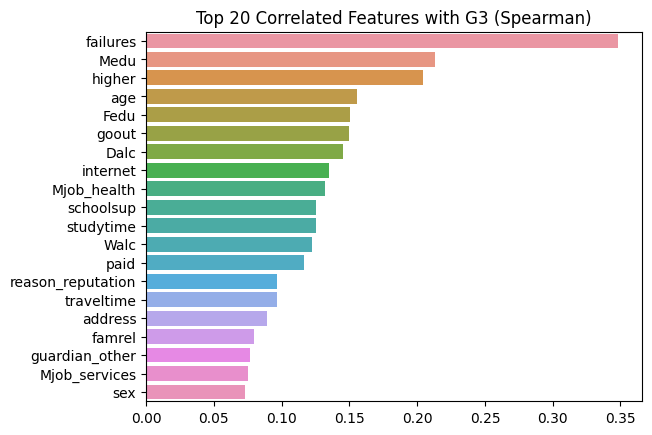

In [14]:
corrs = X_train_df.corrwith(y_train, method="spearman").abs().sort_values(ascending=False)
print(corrs.head(20))

sns.barplot(x=corrs.head(20).values, y=corrs.head(20).index)
plt.title("Top 20 Correlated Features with G3 (Spearman)")
plt.show()

failures             0.289933
higher               0.173841
Medu                 0.165937
age                  0.121823
Fedu                 0.117711
goout                0.117050
Dalc                 0.117026
internet             0.114720
Mjob_health          0.112133
schoolsup            0.106997
studytime            0.101801
paid                 0.099105
Walc                 0.096280
reason_reputation    0.082486
traveltime           0.079602
address              0.076233
guardian_other       0.065115
famrel               0.063989
Mjob_services        0.063836
sex                  0.062010
dtype: float64


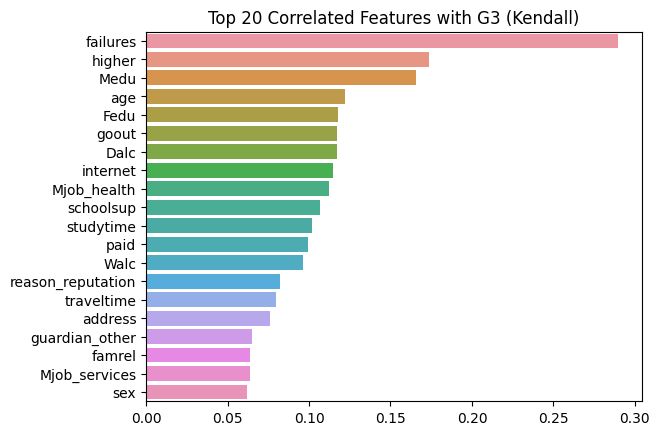

In [15]:
corrs = X_train_df.corrwith(y_train, method="kendall").abs().sort_values(ascending=False)
print(corrs.head(20))

sns.barplot(x=corrs.head(20).values, y=corrs.head(20).index)
plt.title("Top 20 Correlated Features with G3 (Kendall)")
plt.show()

**Resultados**

1. Feature: failures | Average Ranking: 1.0

2. Feature: Medu | Average Ranking: 2.0

3. Feature: higher | Average Ranking: 3.0

4. Feature: age | Average Ranking: 4.3

5. Feature: Fedu | Average Ranking: 5.3

6. Feature: goout | Average Ranking: 8.0

7. Feature: internet | Average Ranking: 8.3

8. Feature: Mjob_health | Average Ranking: 9.3

9. Feature: studytime | Average Ranking: 9.3

10. Feature: paid | Average Ranking: 10.0

11. Feature: reason_reputation | Average Ranking: 13.7

12. Feature: traveltime | Average Ranking: 13.7

13. Feature: address | Average Ranking: 15.3

14. Feature: famrel | Average Ranking: 17.3

15. Feature: sex | Average Ranking: 18.7

## SelectKBest

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X_train_df, y_train)

scores = selector.scores_

feature_scores = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Score': scores
})

top_15_features = feature_scores.sort_values(by='Score', ascending=False).head(15)

print("Top 15 features by SelectKBest (f_regression):\n", top_15_features)


Top 15 features by SelectKBest (f_regression):
               Feature      Score
5            failures  50.990248
1                Medu  15.362176
35             higher  15.085780
32               paid   8.289265
0                 age   6.862115
4           studytime   6.113964
2                Fedu   5.852245
37           romantic   4.806442
36           internet   4.542263
13        Mjob_health   3.963397
3          traveltime   3.619618
8               goout   3.569847
23  reason_reputation   2.897783
29            Pstatus   2.339082
27            address   2.076091


## RFE

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train_df, y_train)

ranking = rfe.ranking_

rfe_ranking_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Ranking': ranking
})

rfe_ranking_df_sorted = rfe_ranking_df.sort_values(by='Ranking')

top_15_rfe = rfe_ranking_df_sorted.head(15)

print("Top 15 features by RFE:\n", top_15_rfe)

Top 15 features by RFE:
               Feature  Ranking
37           romantic        1
15      Mjob_services        1
20       Fjob_teacher        1
13        Mjob_health        1
22       reason_other        1
23  reason_reputation        1
26                sex        1
29            Pstatus        1
31             famsup        1
5            failures        1
4           studytime        1
32               paid        1
33         activities        1
35             higher        1
36           internet        1


## Árvore de Decisão

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_df, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train_df.columns)
top_rf_features = importances.sort_values(ascending=False).head(15)
print("Top 15 features by Random Forest:\n", top_rf_features)

Top 15 features by Random Forest:
 absences         0.192495
failures         0.143550
health           0.055876
goout            0.050899
age              0.040701
studytime        0.034648
freetime         0.032746
Fedu             0.032605
traveltime       0.031893
Walc             0.030458
schoolsup        0.025349
famrel           0.025271
Medu             0.024379
romantic         0.020976
Mjob_services    0.020028
dtype: float64


## Regressão com Lasso

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_df, y_train)

lasso_coef = pd.Series(lasso.coef_, index=X_train_df.columns)
top_lasso_features = lasso_coef.abs().sort_values(ascending=False).head(15)
print("Top 15 features by Lasso:\n", top_lasso_features)

Top 15 features by Lasso:
 failures             1.219141
Medu                 0.262323
studytime            0.036831
Pstatus              0.000000
reason_other         0.000000
reason_reputation    0.000000
guardian_mother      0.000000
guardian_other       0.000000
sex                  0.000000
address              0.000000
famsize              0.000000
age                  0.000000
reason_home          0.000000
famsup               0.000000
paid                 0.000000
dtype: float64


# Resultado Final



Além das informações básicas de cada estudante, como Gênero e Idade, serão consideradas as variáveis:

- Number of past failures (failures)
- Mother's Education (Medu)
- Average Studytime (studytime)
- Interest in higher education (higher)
- Father's Education (Fedu)
- Frequency the student goes out with friends (goout)
- Has internet acess in home? (internet)
- Mother's and Father's Job (Mjob and Fjob)
- If it has extra paid classes (paid)